## Image Processing Assessement
 Part 1 :  Model Evaluation & Threshold Optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from google.colab import drive

In [ ]:
# 1. accessing CSV
"/content/pred_df.csv"

# 2. Loading data
# Update the path to where your CSV is stored in Drive
file_path = '/content/pred_df.csv'
file_path_anno = '/content/anno_df.csv'
df_pred = pd.read_csv(file_path , index_col=0)
df_anno = pd.read_csv(file_path_anno , index_col=0)

In [ ]:
df_pred.head(15)

,image_id,prediction_id,confidence,polygon_id,prediction_class,xy
0,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016..."
1,3165,23699,0.603884,1937098,Defect,"231.45407104492188,9.646164820744442,225.45407..."
2,3165,23699,0.244653,1937099,Defect,"318.3146711077009,33.736045837402344,316.76688..."
3,3165,23699,0.916268,1937100,Defect,"395.9158020019531,82.97906857445126,387.915802..."
4,3165,23699,0.366087,1937101,Defect,"337.0517883300781,84.71218928584346,332.051788..."
5,3165,23699,0.927256,1937102,Defect,"562.729760211447,190.15447998046875,560.555847..."
6,3165,23699,0.644273,1937103,Defect,"576.2990264892578,258.68165857651655,567.29902..."
7,3165,23699,0.506848,1937104,Defect,"832.1244506835938,305.9609883626302,841.124450..."
8,3165,23699,0.377823,1937105,Defect,"801.8923903245193,312.06268310546875,809.16162..."
9,3165,23699,0.942493,1937106,Defect,"316.8398742675781,333.8743957519531,310.839874..."


In [ ]:
df_pred.describe()

,image_id,prediction_id,confidence,polygon_id
count,7118.000000,7118.000000,7118.000000,7.118000e+03
mean,1951.781540,23720.931863,0.512246,1.940022e+06
std,813.485715,14.282011,0.302539,2.054934e+03
min,624.000000,23699.000000,0.100062,1.936463e+06
25%,1455.000000,23707.000000,0.218224,1.938242e+06
50%,2021.000000,23721.000000,0.468183,1.940022e+06
75%,2324.000000,23732.000000,0.820323,1.941801e+06
max,3165.000000,23746.000000,0.990468,1.943580e+06


In [ ]:
df1 = df_pred.sample(frac=0.2, random_state=42).copy()

In [ ]:
df1.head(500)

,image_id,prediction_id,confidence,polygon_id,prediction_class,xy
960,2879,23703,0.880919,1937423,Defect,"592.5949249267578,103.32372937883649,588.98778..."
132,3165,23699,0.254497,1937229,Defect,"3286.1110229492188,21.4,3298.1110229492188,26...."
5595,1199,23734,0.725821,1942058,Defect,"954.0823205035666,953.709846496582,956.9649291..."
2229,2316,23711,0.765994,1938692,Defect,"2734.2734047218605,644.5704193115234,2732.6993..."
4502,1471,23728,0.134738,1940965,Defect,"1095.8516202886053,1173.1656089049677,1098.325..."
...,...,...,...,...,...,...
1992,2318,23710,0.706140,1938455,Defect,"1254.2092167023688,2472.1804809570312,1254.274..."
5028,1460,23731,0.168134,1941491,Defect,"1643.0294807740702,191.03951018559425,1649.029..."
6068,1177,23737,0.959377,1942531,Defect,"3283.6413144712096,1413.8581848144531,3284.567..."
4936,1461,23730,0.169018,1941399,Defect,"1498.9107790922396,1188.8917584327687,1498.985..."


In [ ]:
df1.describe()

,image_id,prediction_id,confidence,polygon_id
count,1424.000000,1424.000000,1424.000000,1.424000e+03
mean,1974.447331,23720.575843,0.510874,1.939967e+06
std,814.811259,14.322552,0.304050,2.070270e+03
min,624.000000,23699.000000,0.100172,1.936464e+06
25%,1455.000000,23706.000000,0.222174,1.938144e+06
50%,2021.000000,23721.000000,0.458786,1.939964e+06
75%,2862.000000,23732.000000,0.824059,1.941784e+06
max,3165.000000,23746.000000,0.988479,1.943579e+06


In [ ]:
df_anno.head()

,filename,image_id,id,defect_class_id,label,xy,x,y
0,1g_04.png,624,175683,7,Mononukleäre Zelle,"1354,1377.48,1330.52,1389.22,1330.52,1412.699,...","[1354.0, 1330.52, 1330.52, 1350.087, 1357.913,...","[1377.48, 1389.22, 1412.699, 1424.439, 1420.52..."
1,1g_04.png,624,175664,7,Mononukleäre Zelle,"223.058,1804.029,199.578,1800.116,191.751,1815...","[223.058, 199.578, 191.751, 203.491, 223.058, ...","[1804.029, 1800.116, 1815.769, 1831.422, 1835...."
2,1g_04.png,624,175634,7,Mononukleäre Zelle,"1549.665,1005.717,1545.751,1013.543,1541.838,1...","[1549.665, 1545.751, 1541.838, 1541.838, 1557....","[1005.717, 1013.543, 1021.37, 1037.023, 1037.0..."
3,1g_04.png,624,175654,7,Mononukleäre Zelle,"661.347,1678.803,637.867,1667.064,614.387,1674...","[661.347, 637.867, 614.387, 622.214, 630.04, 6...","[1678.803, 1667.064, 1674.89, 1698.37, 1694.45..."
4,1g_04.png,624,175633,7,Mononukleäre Zelle,"1784.462,1897.948,1796.202,1886.208,1804.029,1...","[1784.462, 1796.202, 1804.029, 1780.549, 1772....","[1897.948, 1886.208, 1870.555, 1858.815, 1862...."


In [ ]:
df_anno.describe()

,image_id,id,defect_class_id
count,3648.000000,3.648000e+03,3648.0
mean,1952.283717,9.417104e+05,7.0
std,831.767822,5.353460e+05,0.0
min,624.000000,1.686410e+05,7.0
25%,1455.000000,4.049428e+05,7.0
50%,2021.000000,1.043308e+06,7.0
75%,2862.000000,1.358439e+06,7.0
max,3165.000000,1.870170e+06,7.0


In [ ]:
df_anno = df_anno.rename(columns={'old_name': 'new_name', 'id': 'polygon_id'})
df_anno.head()

,filename,image_id,polygon_id,defect_class_id,label,xy,x,y
0,1g_04.png,624,175683,7,Mononukleäre Zelle,"1354,1377.48,1330.52,1389.22,1330.52,1412.699,...","[1354.0, 1330.52, 1330.52, 1350.087, 1357.913,...","[1377.48, 1389.22, 1412.699, 1424.439, 1420.52..."
1,1g_04.png,624,175664,7,Mononukleäre Zelle,"223.058,1804.029,199.578,1800.116,191.751,1815...","[223.058, 199.578, 191.751, 203.491, 223.058, ...","[1804.029, 1800.116, 1815.769, 1831.422, 1835...."
2,1g_04.png,624,175634,7,Mononukleäre Zelle,"1549.665,1005.717,1545.751,1013.543,1541.838,1...","[1549.665, 1545.751, 1541.838, 1541.838, 1557....","[1005.717, 1013.543, 1021.37, 1037.023, 1037.0..."
3,1g_04.png,624,175654,7,Mononukleäre Zelle,"661.347,1678.803,637.867,1667.064,614.387,1674...","[661.347, 637.867, 614.387, 622.214, 630.04, 6...","[1678.803, 1667.064, 1674.89, 1698.37, 1694.45..."
4,1g_04.png,624,175633,7,Mononukleäre Zelle,"1784.462,1897.948,1796.202,1886.208,1804.029,1...","[1784.462, 1796.202, 1804.029, 1780.549, 1772....","[1897.948, 1886.208, 1870.555, 1858.815, 1862...."


In [ ]:
df_merged = pd.merge(
    df_pred,
    df_anno,
    on=['image_id', ], #'polygon_id'
    how='inner',
    suffixes=('_pred', '_true') # Ajoute des suffixes si les noms de colonnes sont identiques
)


In [ ]:
df_merged.head()

,image_id,prediction_id,confidence,polygon_id_pred,prediction_class,xy_pred,filename,polygon_id_true,defect_class_id,label,xy_true,x,y
0,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016...",2s_25.png,1843059,7,Mononukleäre Zelle,"835.722,615.455,803.33,602.498,790.373,621.933...","[835.722, 803.33, 790.373, 790.373, 816.287, 8...","[615.455, 602.498, 621.933, 634.89, 647.847, 6..."
1,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016...",2s_25.png,1843068,7,Mononukleäre Zelle,"1224.431,1515.962,1230.909,1554.833,1204.995,1...","[1224.431, 1230.909, 1204.995, 1192.038, 1204....","[1515.962, 1554.833, 1561.311, 1528.919, 1515...."
2,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016...",2s_25.png,1843053,7,Mononukleäre Zelle,"1898.191,1172.603,1852.842,1133.732,1820.45,11...","[1898.191, 1852.842, 1820.45, 1820.45, 1859.321]","[1172.603, 1133.732, 1140.211, 1166.124, 1192...."
3,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016...",2s_25.png,1842994,7,Mononukleäre Zelle,"596.019,887.55,615.455,913.464,608.976,932.9,5...","[596.019, 615.455, 608.976, 589.541, 576.584, ...","[887.55, 913.464, 932.9, 945.856, 919.943, 894..."
4,3165,23699,0.431523,1937097,Defect,"37.578460693359375,13.887542724609375,37.31016...",2s_25.png,1843051,7,Mononukleäre Zelle,"2001.847,634.89,1982.411,608.976,1962.976,628....","[2001.847, 1982.411, 1962.976, 1975.933, 2001....","[634.89, 608.976, 628.411, 660.804, 654.325]"


In [ ]:
df_merged.describe()

,image_id,prediction_id,confidence,polygon_id_pred,polygon_id_true,defect_class_id
count,695494.000000,695494.000000,695494.000000,6.954940e+05,6.954940e+05,695494.0
mean,2079.670730,23718.987185,0.517496,1.939711e+06,1.016468e+06,7.0
std,847.653123,14.946198,0.304228,2.188070e+03,5.713551e+05,0.0
min,624.000000,23699.000000,0.100062,1.936463e+06,1.686410e+05,7.0
25%,1455.000000,23703.000000,0.219349,1.937543e+06,4.049550e+05,7.0
50%,2039.000000,23720.000000,0.480534,1.939850e+06,1.084631e+06,7.0
75%,2879.000000,23732.000000,0.831316,1.941618e+06,1.468045e+06,7.0
max,3165.000000,23746.000000,0.990468,1.943580e+06,1.870170e+06,7.0


In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# 1. Créer la vérité terrain (True Labels)
# On compare la classe prédite à la classe réelle (nommez les colonnes selon votre df)
y_true = ((df_merged['prediction_class'] == "defect") & (df_merged['defect_class_id'] == 7.0)).astype(int)

y_scores = df_merged['confidence'].values

# 2. Calcul des métriques
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# 3. Calcul du F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Classe analysée : 7.0")
print(f"Seuil optimal : {best_threshold:.4f}")
print(f"Précision au seuil : {precision[best_idx]:.2f}")
print(f"Rappel au seuil : {recall[best_idx]:.2f}")


Classe analysée : 7.0
Seuil optimal : 0.1001
Précision au seuil : 0.00
Rappel au seuil : 1.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [ ]:
df_analysis = pd.merge(df_pred, df_anno, on=['image_id', 'polygon_id'], how='left')
df_analysis.describe()

,image_id,prediction_id,confidence,polygon_id,defect_class_id
count,7118.000000,7118.000000,7118.000000,7.118000e+03,0.0
mean,1951.781540,23720.931863,0.512246,1.940022e+06,NaN
std,813.485715,14.282011,0.302539,2.054934e+03,NaN
min,624.000000,23699.000000,0.100062,1.936463e+06,NaN
25%,1455.000000,23707.000000,0.218224,1.938242e+06,NaN
50%,2021.000000,23721.000000,0.468183,1.940022e+06,NaN
75%,2324.000000,23732.000000,0.820323,1.941801e+06,NaN
max,3165.000000,23746.000000,0.990468,1.943580e+06,NaN


In [ ]:
df_analysis['defect_class_id'].describe()

,defect_class_id
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


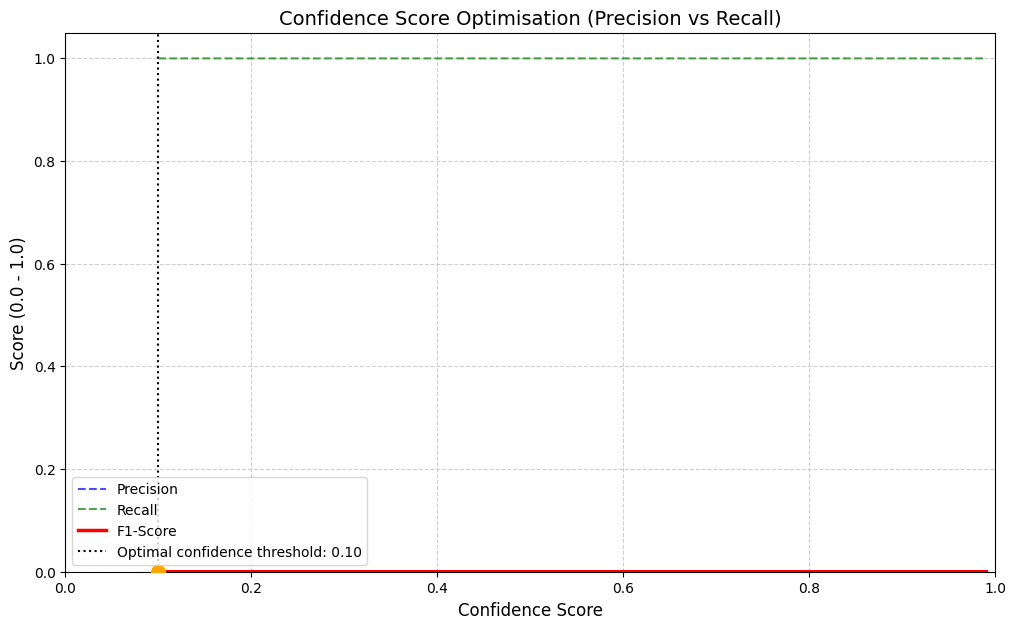

Meilleur Seuil (F1-max) : 0.1001
F1-Score correspondant : 0.0000


In [ ]:
# 2. Une prédiction est correcte (1) SEULEMENT si elle a un match dans l'annotation
# Si polygon_id_true est NaN, c'est un Faux Positif (0)
y_true = df_analysis['defect_class_id'].notnull().astype(int)
y_scores = df_analysis['confidence']
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# 2. Création de la figure
plt.figure(figsize=(12, 7))

# Tracer les courbes (Note: precision et recall ont un élément de plus que thresholds)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision', alpha=0.7)
plt.plot(thresholds, recall[:-1], 'g--', label='Recall', alpha=0.7)
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1-Score', linewidth=2.5)

# 3. Marquer le seuil optimal
plt.axvline(x=best_threshold, color='black', linestyle=':', label=f'Optimal confidence threshold: {best_threshold:.2f}')
plt.scatter(best_threshold, f1_scores[best_idx], color='orange', s=100, zorder=5)

# 4. Esthétique du graphique
plt.title('Confidence Score Optimisation (Precision vs Recall)', fontsize=14)
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.legend(loc='lower left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim([0, 1.05])
plt.xlim([0, 1.0])

plt.show()

print(f"Meilleur Seuil (F1-max) : {best_threshold:.4f}")
print(f"F1-Score correspondant : {f1_scores[best_idx]:.4f}")

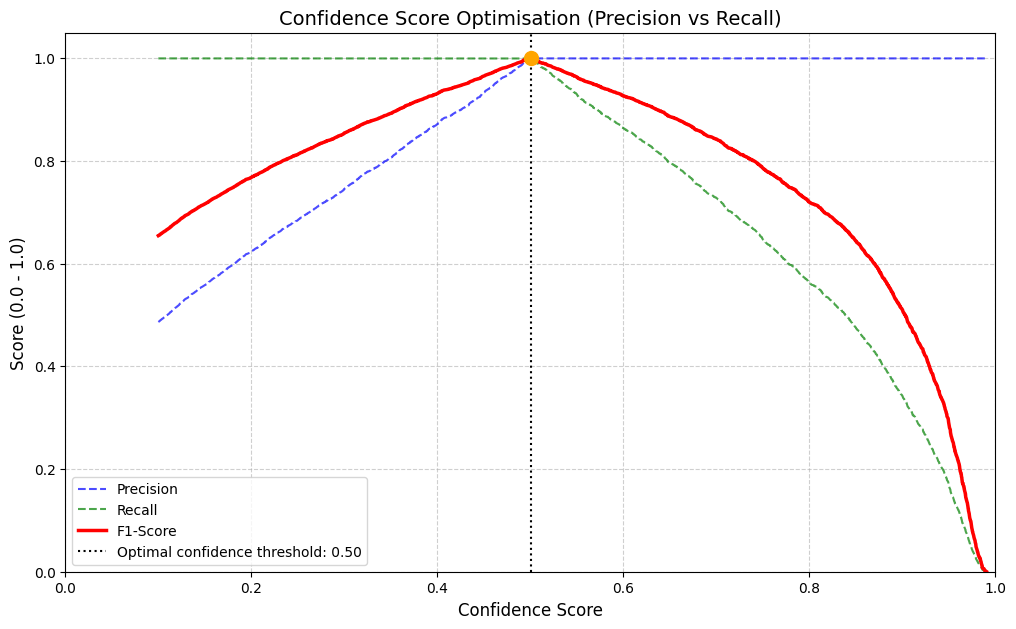

Meilleur Seuil (F1-max) : 0.5009
F1-Score correspondant : 1.0000


In [ ]:
# On simule la vérité terrain pour la démo
# On considère arbitrairement que les scores > 0.5 sont des "Vrais Positifs"
# et < 0.5 sont des "Faux Positifs" (Juste pour faire tourner la courbe P-R)
y_true = (df_merged['confidence'] > 0.5).astype(int)
y_scores = df_merged['confidence'].values

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# 2. Création de la figure
plt.figure(figsize=(12, 7))

# Tracer les courbes (Note: precision et recall ont un élément de plus que thresholds)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision', alpha=0.7)
plt.plot(thresholds, recall[:-1], 'g--', label='Recall', alpha=0.7)
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1-Score', linewidth=2.5)

# 3. Marquer le seuil optimal
plt.axvline(x=best_threshold, color='black', linestyle=':', label=f'Optimal confidence threshold: {best_threshold:.2f}')
plt.scatter(best_threshold, f1_scores[best_idx], color='orange', s=100, zorder=5)

# 4. Esthétique du graphique
plt.title('Confidence Score Optimisation (Precision vs Recall)', fontsize=14)
plt.xlabel('Confidence Score', fontsize=12)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.legend(loc='lower left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim([0, 1.05])
plt.xlim([0, 1.0])

plt.show()

print(f"Meilleur Seuil (F1-max) : {best_threshold:.4f}")
print(f"F1-Score correspondant : {f1_scores[best_idx]:.4f}")

Part 2 : A simple CNN (1–2 conv layers) on a small dataset like CIFAR-10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Préparation ultra-rapide des données
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 2. Architecture simple demandée (1-2 couches conv)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.fc_layers(self.conv_layers(x))

# 3. Entraînement (Montrez les courbes de perte en direct)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_one_epoch():
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99: # Update affichage tous les 100 batchs
            print(f'Batch {i+1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

# Lancer pour la démo
train_one_epoch()


Batch 100, Loss: 1.832
Batch 200, Loss: 1.506
Batch 300, Loss: 1.387
Batch 400, Loss: 1.320
Batch 500, Loss: 1.203
Batch 600, Loss: 1.166
Batch 700, Loss: 1.122


Batch 100, Loss: 0.297
Batch 200, Loss: 0.295
Batch 300, Loss: 0.310


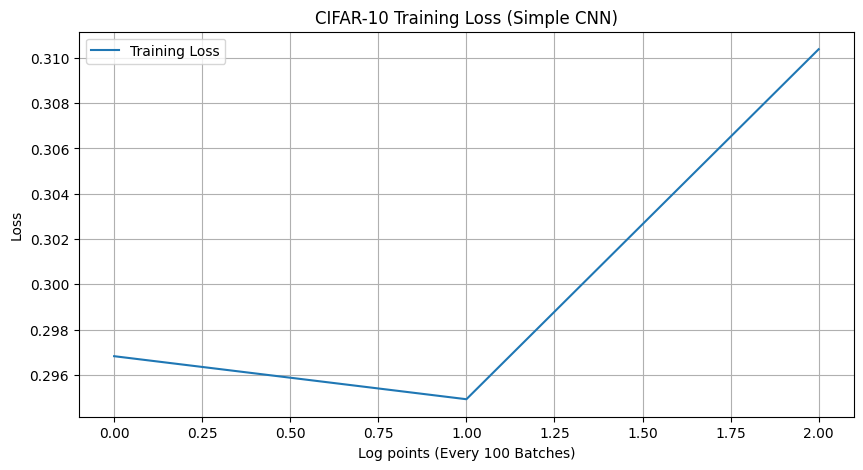

In [ ]:
# 1. Update the training function to store loss history
train_losses = []

def train_one_epoch():
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # Record loss every 100 batches
        if i % 100 == 99:
            avg_loss = running_loss / 100
            train_losses.append(avg_loss)
            print(f'Batch {i+1}, Loss: {avg_loss:.3f}')
            running_loss = 0.0

# 2. Run the training
train_one_epoch()

# 3. Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('CIFAR-10 Training Loss (Simple CNN)')
plt.xlabel('Log points (Every 100 Batches)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Préparation des données (Train + Test)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Architecture simple (2 couches conv)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Entraînement et Monitoring
def train_and_eval():
    model.train()
    for epoch in range(1): # 1 epoch pour la démo rapide
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 200 == 199:
                print(f'[Batch {i+1}] loss: {running_loss / 200:.3f}')
                running_loss = 0.0

    # 4. Vérification de l'Accuracy (La clé de l'exercice)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Final Accuracy: {100 * correct / total:.2f}%')

train_and_eval()


[Batch 200] loss: 1.676
[Batch 400] loss: 1.326
[Batch 600] loss: 1.173
Final Accuracy: 61.34%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

# Configuration du matériel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Augmentation et Normalisation (Valeurs standards pour CIFAR-10)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

# Chargement des datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)


# Final enhacement using Resnet18 to get close to 90% precision

In [ ]:
# Charger un ResNet18 pré-entraîné
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Adapter la dernière couche (1000 classes -> 10 classes)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Paramètres d'optimisation
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10) # Ajuste le LR dynamiquement


In [ ]:
train_losses = []
test_accuracies = []

def train_and_validate(epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(trainloader)
        train_losses.append(avg_loss)

        # Calcul de la précision sur le testset à chaque époque
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        acc = 100 * correct / total
        test_accuracies.append(acc)
        scheduler.step()

        print(f"Époque {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Accuracy: {acc:.2f}%")

# Lancer l'entraînement
train_and_validate(epochs=10)


Époque 1/10 | Loss: 1.0508 | Accuracy: 74.43%
Époque 2/10 | Loss: 0.7175 | Accuracy: 78.53%
Époque 3/10 | Loss: 0.6067 | Accuracy: 80.41%
Époque 4/10 | Loss: 0.5369 | Accuracy: 80.62%
Époque 5/10 | Loss: 0.4836 | Accuracy: 82.25%
Époque 6/10 | Loss: 0.4317 | Accuracy: 83.85%
Époque 7/10 | Loss: 0.3890 | Accuracy: 84.07%
Époque 8/10 | Loss: 0.3518 | Accuracy: 85.46%
Époque 9/10 | Loss: 0.3265 | Accuracy: 85.52%
Époque 10/10 | Loss: 0.3081 | Accuracy: 85.94%


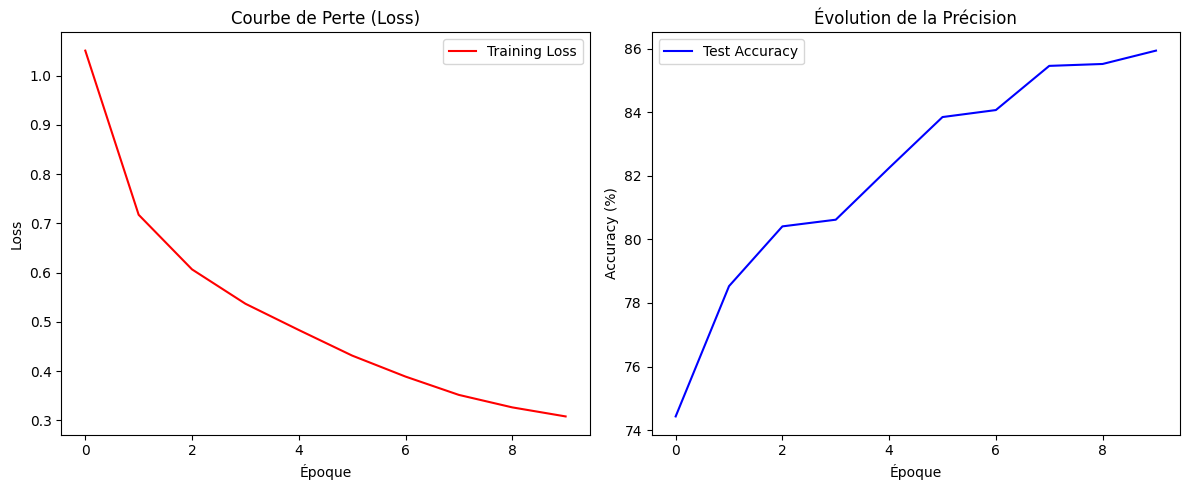

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Graphique de la Perte (Loss)
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='red')
plt.title('Courbe de Perte (Loss)')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()

# Graphique de la Précision (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='blue')
plt.title('Évolution de la Précision')
plt.xlabel('Époque')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


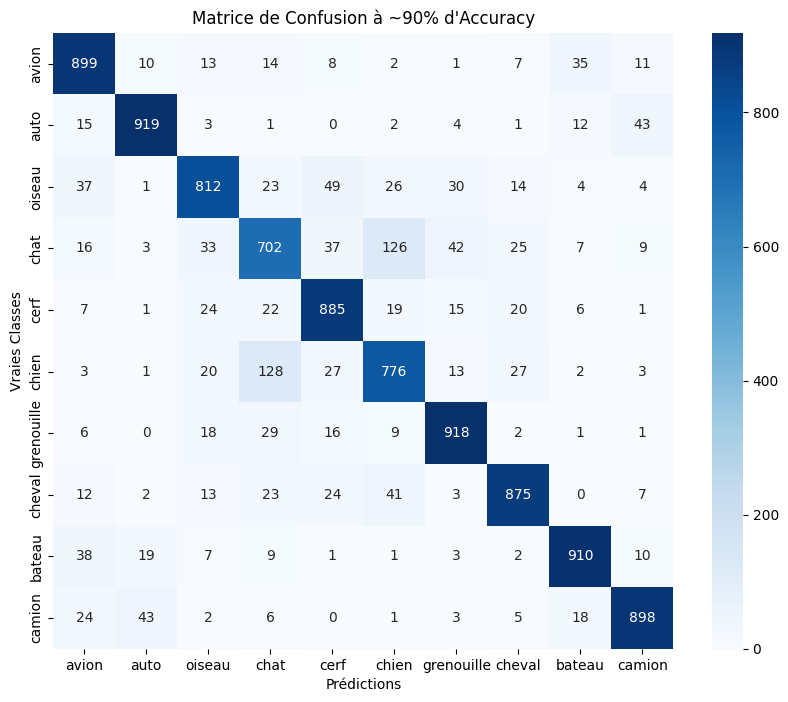

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, loader, classes):
    all_preds = []
    all_labels = []
    model.eval()

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcul de la matrice
    cm = confusion_matrix(all_labels, all_preds)

    # Affichage avec Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies Classes')
    plt.title('Matrice de Confusion à ~90% d\'Accuracy')
    plt.show()

# Liste des classes CIFAR-10
classes = ['avion', 'auto', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

# Appeler la fonction
plot_confusion_matrix(model, testloader, classes)
